# NLP Basics and Important terms

```
- [S22] Natural Language Processing, Innopolis University 
- Professor: Vladimir Ivanov 
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

```
Plan : 
  1. Introduction
  2. Important terms
  3. Basics
  4. Assignment 1
```


## 1. **NLP Pipeline**
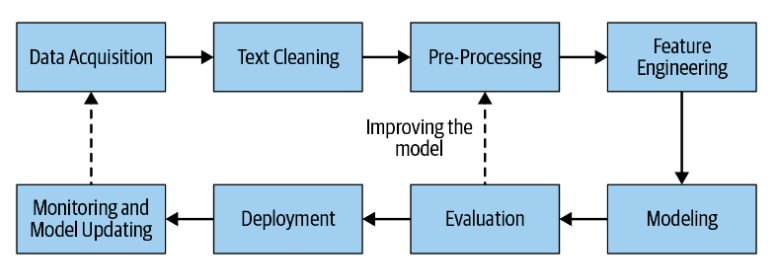

## 2. Important terms

Natural Language Processing (NLP) is the task of making computers understand and produce human languages.

## What is a Corpus?

The list of available NLTK corpora is given at: https://www.nltk.org/nltk_data/


Examlpe of popular and most commonly used corpus : `brown` :
The Corpus is divided into 500 samples of 2000+ words each.

In [14]:
import nltk
from nltk.corpus import brown #, movie_reviews, reuters

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

nltk.download('brown')
# nltk.download('reuters') nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [15]:
brown.sents()[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

## Sentence Segmentation

Breaking up text into sentences at the appearance of full stops and question marks.

**What could go wrong here?**

In [16]:
from nltk.tokenize import sent_tokenize

text = """Extreme value theory in more than one variable introduces additional issues that have to be addressed. 
One problem that arises is that one must specify what constitutes an extreme event.[20] Although this is straightforward in the univariate case, 
there is no unambiguous way to do this in the multivariate case. The fundamental problem is that although it is 
possible to order a set of real-valued numbers, there is no natural way to order a set of vectors. at a specific 
time and the values at a later time. Which of these events would be considered more extreme? There is no universal 
answer to this question (e.g., Chapters 4–7).
"""

In [17]:
all_sentences = sent_tokenize(text)
all_sentences

['Extreme value theory in more than one variable introduces additional issues that have to be addressed.',
 'One problem that arises is that one must specify what constitutes an extreme event.',
 '[20] Although this is straightforward in the univariate case, \nthere is no unambiguous way to do this in the multivariate case.',
 'The fundamental problem is that although it is \npossible to order a set of real-valued numbers, there is no natural way to order a set of vectors.',
 'at a specific \ntime and the values at a later time.',
 'Which of these events would be considered more extreme?',
 'There is no universal \nanswer to this question (e.g., Chapters 4–7).']

## Tokenization

Similar to sentence tokenization, to tokenize a sentence into words, we can start with a simple rule to split text into words based on the presence of punctuation marks.

There are different Tokenization techniques :

1. White Space Tokenization
1. Dictionary Based Tokenization
1. Rule Based Tokenization
1. Regular Expression Tokenizer
1. Penn TreeBank Tokenization
1. Spacy Tokenizer
1. Byte-Pair Encoding (BPE)

We will look at some of them but you can experiment with the rest

## White Space Tokenization

Given a sentence or paragraph it tokenizes into words by splitting the input whenever a white space in encountered. This is the fastest tokenization technique but will work for languages in which the white space breaks apart the sentence into meaningful words. 

### What could be a disadvantage of this method? 

**TODO:** Implement a simple tokenizer using :    
1. Pure python without any libraries
2. NLTK library 
3. Regular expression `regex`

Compare the 3 implementations outputs

In [18]:
text = '''Good muffins cost $3.88\nin New York.  Please buy me
... two of them.\n\nThanks.'''

# core python
def tokenize_python(text):
    # this is the simplest possible tokenization using core python
    basic_list = text.split()
    # filter the empty strings
    return [t for t in basic_list if t]

# nltk
from nltk.tokenize import word_tokenize
def tokenize_nltk(text):
    return word_tokenize(text)

# use regex
import re
def tokenize_regex(text):
    return re.split('[\s+\W]', text)


print(tokenize_python(text))
print(tokenize_nltk(text))
print(tokenize_regex(text))


['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks.']
['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']
['Good', 'muffins', 'cost', '', '3', '88', 'in', 'New', 'York', '', '', 'Please', 'buy', 'me', 'two', 'of', 'them', '', '', 'Thanks', '']


1. The core python tokenizer is limited in capacity as it can only tokenize based on white spaces
2. The regex tokenizer is rule-based. Which means it might be extremely difficult to formalize the exact rule to use (the difference between a point as a decimal point in a number of a punctuation sign is not so trivial to formalize)
3. The nlkt is empowered by statistical methods, thus it can tokenize text not only based on white spaces.

## Dictionary Based Tokenization

Tokens are found based on the tokens already existing in the dictionary. If the token is not found, then special rules are used to tokenize it. It is an advanced technique compared to whitespace tokenizer.

### Penn TreeBank Tokenization

Steps: 
- split standard contractions, e.g. ``don't`` -> ``do n't`` and ``they'll`` -> ``they 'll``
- treat most punctuation characters as separate tokens
- split off commas and single quotes, when followed by whitespace
- separate periods that appear at the end of line

**TODO:** Implement the Penn TreeBank Tokenization using `re` in python and compare the results with NLTK

In [19]:
from string import punctuation
# the 1st rule:
# split by standard contractions: let's define them first
standard_contractions = ["n't", "'ll", "'d", "'s", "'m"] # n't, 'll, 'd, 's 'm
standard_contrac_regex = f"({'|'.join(standard_contractions)})"

# a correct regex for special characters (each one of them is appended with the \ character)
special_chars = [',', "'", '.', '+', '-', '/', '[', ']', '(', ')', '*', '?', '$', '^', '|']
special_chars = ['\\' + c + '+' for c in special_chars]
special_chars_regex = "(" + '|'.join(special_chars) + ")"

# a regex for punctuation marks that do not belong to the special regex characters
modified_punctuation = re.sub(special_chars_regex, '', punctuation)
modified_punctuation = [p + "+" for p in modified_punctuation]
punc_regex = f"({'|'.join(modified_punctuation)})"


# 3rd rule
# a comma or a single quote fellowed by a space should be used as a delimiter
comma_quote = [r"'\s+", r",\s+"]
comma_quote_regex = f"({'|'.join(comma_quote)})"

# 4th rule
# periods at the end of the line: let's use anchors or the end of the line character
end_line = ['\.\n+', '\.$']
end_line_regex = f"({'|'.join(end_line)})"

from copy import copy
# final regex
all_chars = copy(special_chars[3:])
all_chars.extend(standard_contractions)
all_chars.extend(modified_punctuation)
all_chars.extend(comma_quote)
all_chars.extend(end_line)

tbw_regex = f"({'|'.join(all_chars)})"

print(tbw_regex)

(\++|\-+|\/+|\[+|\]+|\(+|\)+|\*+|\?+|\$+|\^+|\|+|n't|'ll|'d|'s|'m|!+|"+|#+|%+|&+|:+|;+|<+|=+|>+|@+|\+|_+|`+|{+|}+|~+|'\s+|,\s+|\.
+|\.$)


In [20]:
print(punc_regex)

(!+|"+|#+|%+|&+|:+|;+|<+|=+|>+|@+|\+|_+|`+|{+|}+|~+)


In [21]:
import itertools
def customer_tbw(text):
    # first tokenize by standards contractions
    tokens = re.split(standard_contrac_regex, text)
    # tokenize each token by punctuation
    tokens = list(itertools.chain(*[re.split(punc_regex, t) for t in tokens]))
    # tokenize each token by special characters
    tokens = list(itertools.chain(*[re.split(special_chars_regex, t) for t in tokens]))
    # tokenize each token by commas and single quotes
    tokens = list(itertools.chain(*[re.split(comma_quote_regex, t) for t in tokens]))
    # tokenize each token by the end of the line
    tokens = list(itertools.chain(*[re.split(end_line_regex, t) for t in tokens]))
    # tokenize by white spaces
    tokens = list(itertools.chain(*[re.split(r'\s+', t) for t in tokens]))
    # return the filtered version of the array]
    return [t for t in tokens if t]

from nltk.tokenize import TreebankWordTokenizer
a = "don't be' late I'll be--sad"
print(TreebankWordTokenizer().tokenize(a))

print(customer_tbw(a))

['do', "n't", 'be', "'", 'late', 'I', "'ll", 'be', '--', 'sad']
['do', 'n', "'", 't', 'be', "'", 'late', 'I', "'", 'll', 'be', '--', 'sad']


## Regular Expression Tokenizer

Its a dynamic rules-based tokenization

Regular expressions Tokenizer splits the texts by searching matches of a specific search pattern. 

For example, a tokenizer that forms the tokens out of money expressions and any other non-whitespace sequences.

**TODO : retrieve any .html page and tokenize the text using regex and NLTK RegexpTokenizer()** 



In [22]:
from nltk.tokenize import RegexpTokenizer
text = "The cost of the OCE excursions - from 200 rubles. up to  ₽350., Moscow and Moscow region from  ₽750. up to  ₽1000"
reg_expr = "\w+|\₽[\d\d].]+\s+"
tokenizer = RegexpTokenizer(reg_expr)
result = tokenizer.tokenize(text)

In [23]:
print(result)

['The', 'cost', 'of', 'the', 'OCE', 'excursions', 'from', '200', 'rubles', 'up', 'to', '350', 'Moscow', 'and', 'Moscow', 'region', 'from', '750', 'up', 'to', '1000']


In [24]:
from nltk.tokenize import RegexpTokenizer
import re
import requests
#TODO : retrieve any .html page and tokenize the text using regex and RegexpTokenizer
url = 'http://sprotasov.ru/data/iu.txt'
html_text = requests.get(url, allow_redirects=True).text[:2000]

# let's tokenize
print(tokenizer.tokenize(html_text))

['title', 'Introduction', 'to', 'multithreading', 'id', '5001', 'parentId', 'null', 'tags', 'parallel', 'iu', 'summer', 'school', 'lock', 'synchronized', 'atomic', 'java', 'thread', 'author', 'Stanislav', 'Protasov', 'url', 'https', 'yadi', 'sk', 'i', 'HnPbI1z', '3QkmDv', 'description', 'Mutlithreading', 'and', 'multicore', 'programming', 'Synchroniation', 'patterns', 'in', 'Java', 'locks', 'synchronized', 'atomics', 'contentType', 'video', 'image', 'title', 'Introduction', 'to', 'multithreading', 'id', '5002', 'parentId', '5001', 'tags', 'parallel', 'iu', 'summer', 'school', 'lock', 'synchronized', 'atomic', 'java', 'thread', 'author', 'Stanislav', 'Protasov', 'url', 'https', 'yadi', 'sk', 'd', 'VHO55x2m3QkmMg', 'description', 'Mutlithreading', 'and', 'multicore', 'programming', 'Synchroniation', 'patterns', 'in', 'Java', 'locks', 'synchronized', 'atomics', 'contentType', 'presentation', 'image', 'title', 'Problems', 'of', 'multithread', 'programming', 'id', '5003', 'parentId', 'null'

In [25]:
sentence_endings = r"sent*"
my_string = 'my_string on sentence endings'
# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

['my_string on ', 'ence endings']


## Lowercasing

The CAPS in the texts are RATHER irritating although we KNOW the guy is trying to EMPHASIZE on something. However upper or lowercase may not make a difference for the problem in some cases. 

## Stopwords

Removing punctuation and/or numbers is also a common step for many NLP problems, such as text classification

In [26]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from string  import punctuation 

my_corpus = "In the summer's gaily singing 100 times, Of the future isn't thinking \nBut the winter's nearby. \nField was green, it's now reddish, \nHappy @days already vanished"

def preprocess_corpus(texts):
  mystopwords = set(stopwords.words("english")) 
  def remove_stops_digits(tokens):
    return [token.lower() for token in tokens if token not in mystopwords and 
          not token.isdigit() and token not in punctuation]
          
  return [remove_stops_digits(word_tokenize(text)) for text in texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
print(my_corpus.split('\n'))
result = preprocess_corpus(my_corpus.split('\n'))
print('\n-----results-------')
print(*result,sep="\n")

["In the summer's gaily singing 100 times, Of the future isn't thinking ", "But the winter's nearby. ", "Field was green, it's now reddish, ", 'Happy @days already vanished']

-----results-------
['in', 'summer', "'s", 'gaily', 'singing', 'times', 'of', 'future', "n't", 'thinking']
['but', 'winter', "'s", 'nearby']
['field', 'green', "'s", 'reddish']
['happy', 'days', 'already', 'vanished']


## Stemming 

Removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form.


Often we want to map the different forms of the same word to the same root word, e.g. "walks", "walking", "walked" should all be the same as "walk".

The stemming and lemmatization process are hand-written regex rules written find the root word.

**Stemming**: Trying to shorten a word with simple regex rules

In [28]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

for word in ['walking', 'walks', 'walked']:
    print(porter.stem(word))

walk
walk
walk


## Lemmatization

Lemmatization requires more linguistic knowledge, and modeling and developing efficient lemmatizers remains an open problem in NLP research even now

**Lemmatization**: Trying to find the root word with linguistics rules (with the use of regexes)

A lemma refers to the canonical root word used as a dictionary entry.

NLTK Lemmatization function is based on part-of-speech and WordNet (a lexical database of semantic relations between words)


In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bouab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

words = ['walking', 'walks', 'walked']
for word in words:
    print(f'{word} -> {wnl.lemmatize(word)}')

walking -> walking
walks -> walk
walked -> walked


## spaCy pipeline

![](https://spacy.io/pipeline-design-46d249f6f048cda4c8a8f8147d332bb5.svg)


For russian : 
**Make sure that you have spacy 3.1.0 In colab use `!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz`**


In [31]:
import spacy
nlp_pipeline = spacy.load('en_core_web_sm') 
token = nlp_pipeline(u'walking walks walked')

for word in token:
  print(f'{word.text} -> {word.lemma_}')

walking -> walking
walks -> walk
walked -> walk


In [ ]:
! pip install --user https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz
import spacy
from spacy.lang.ru.examples import sentences

nlp_pipeline_ru = spacy.load('ru_core_news_sm') 
tokens = nlp_pipeline_ru(sentences[5])
print(sentences[5])
for word in tokens:
  print(f'{word.text} -> {word.pos_}')

In [34]:
spacy.__version__

'3.5.0'

## Subword Tokenization

[Summary of the tokenizers](https://huggingface.co/docs/transformers/tokenizer_summary)
* Byte-Pair Encoding (BPE)
* WordPiece
* SentencePiece

In [35]:
! pip install sentencepiece
! wget https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

     ---------------------------------------- 1.1/1.1 MB 5.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import sentencepiece as spm


spm.SentencePieceTrainer.train('--input=botchan.txt --model_prefix=m --vocab_size=2000')

# makes segmenter instance and loads the model file (m.model)
sp = spm.SentencePieceProcessor()
sp.load('m.model')

# encode: text => id
print(sp.encode_as_pieces('This is a test'))
print(sp.encode_as_ids('This is a test'))

# decode: id => text
print(sp.decode_pieces(['▁This', '▁is', '▁a', '▁t', 'est']))
print(sp.decode_ids([209, 31, 9, 375, 586]))

Why doesn't "est" start with _?

**Answer:**


How is sentencepiece better than wordpiece?

**Answer:** 

Sentencepiece does not assume that the words / tokens can be separated by white spaces. It treats text as an input stream which makes it both more reliable and more flexible.

## References 

* [Dynamic Word Tokenization with Regex Tokenizer](https://towardsdatascience.com/dynamic-word-tokenization-with-regex-tokenizer-801ae839d1cd)
* [Regular Expressions: Regexes in Python (Part 1)](https://realpython.com/regex-python/)
* [Regular Expressions: Regexes in Python (Part 2)](https://realpython.com/regex-python-part-2/)
* [Spacy models](https://spacy.io/models)
* [Universal POS tags](https://universaldependencies.org/u/pos/)